In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# 1 导入相关库和数据文件

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data_train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2分析目标变量及主要特征关系

## 2.1 分析目标变量

* 本阶段的主要任务是：
* 1 分析目标变量即SalePrice；
* 2 从大量的特征变量筛选相关性大的变量；
* 3 寻找与目标变量相关性大的变量

In [4]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

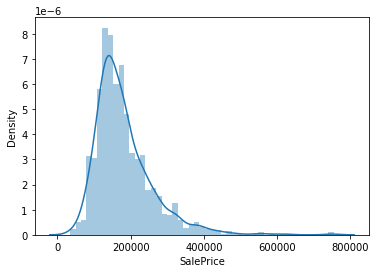

In [5]:
sns.distplot(data_train['SalePrice'])

* 峰度（Kurtosis）和 偏度（Skewness）的概念。

* 峰度：峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量。它是和正态分布相比较的。

>Kurtosis=0 与正态分布的陡缓程度相同。
Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
Kurtosis<0 比正态分布的高峰来得平台——平顶峰计算公式：β = M_4 /σ^4 偏度：

* 偏度：偏度（Skewness）是描述某变量取值分布对称性的统计量。

>Skewness=0 分布形态与正态分布偏度相同
Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。

In [6]:
data_train['SalePrice'].skew(),data_train['SalePrice'].kurt()

(1.8828757597682129, 6.536281860064529)

* Targe值确实是右偏的,现在利用利用log(1+x)进行log变换
* SalePrice是非正态分布，由于要分析其与其他特征的相关性暂不做log(1+x)转换。后面要进行转换

# 2.2   分析特征变量

* 其中有46个分类型号变量特征，34个连续型变量特征。
* 从中初步筛选，并假定这些特征与目标变量相关，后面再做验证。

    
| 特征变量 | 数据类型 | 含义 | 
| :-----| ----: | :----: 
| MSZoning | 分类 | 区域分类 |
| LotArea | 连续 | 建筑面积 |
| Utility | 分类 | 公用设施提供 |
| Neighborhood | 分类 | 地理位置 |
| BldgType | 分类 | 住宅类型 |
| OverallQual| 分类 | 完工质量及用才 |
| YearBuilt | 分类 | 完工年份 |
| Heating | 分类 | 供热 |
| CentralAir | 分类 | 中央空调 |
| 1stFlrSF | 连续 | 1层面积 |
| GrLivArea | 连续 | 地面上生活区域 |
| TotalBsMtSF | 连续 | 地下室面积 |

In [7]:
def var_corr_plot(var):
    data = pd.concat([data_train['SalePrice'], var], axis=1)
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)

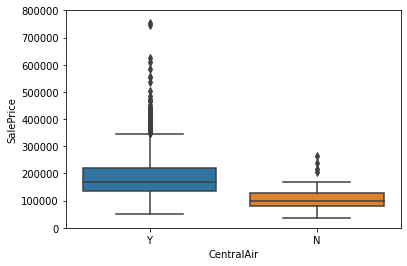

In [8]:
var_corr_plot(data_train['CentralAir'])

* "CentralAir"指标和目标变量相关。

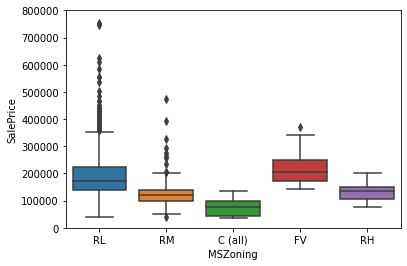

In [9]:
var_corr_plot(data_train['MSZoning'])

*结论： MSZoning 和目标变量相关，保留。

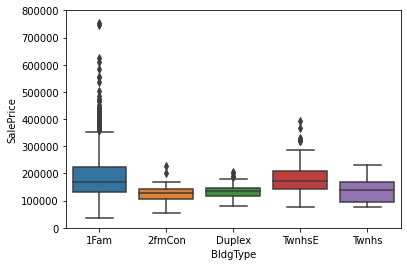

In [10]:
var_corr_plot(data_train['BldgType'])

* BldgType 这个指标和目标变量关联性不强，不考虑。

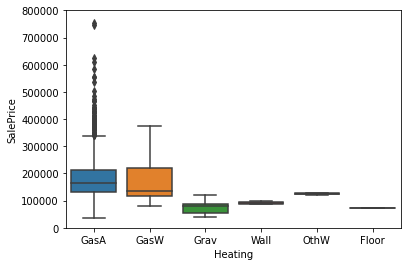

In [11]:
var_corr_plot(data_train['Heating'])

*结论：Heating和目标变量关联性不大，不考虑

In [12]:
data_train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

* 结论： Utility 特征值都是AllPub,不考虑此特征与特征变量的相关性。

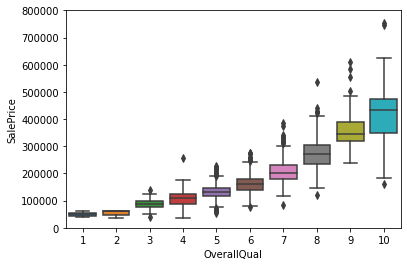

In [13]:
var_corr_plot(data_train['OverallQual'])

* "OveralQual"是标识房屋整体材质的指标，数值越高级别越高，这个是强相关指标。

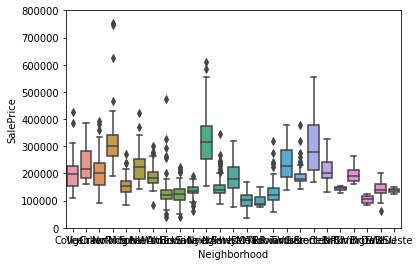

In [14]:
var_corr_plot(data_train['Neighborhood'])

* Neighborhood 和价格关联性特征并不明显，不考虑

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

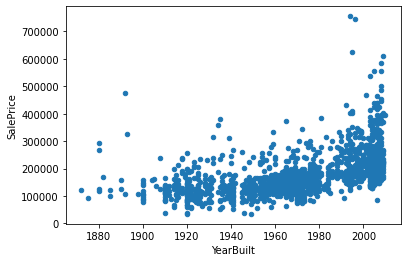

In [15]:
var="YearBuilt"
data = pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

* 修建年份和价格存在一定的相关性，保留此特征。

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

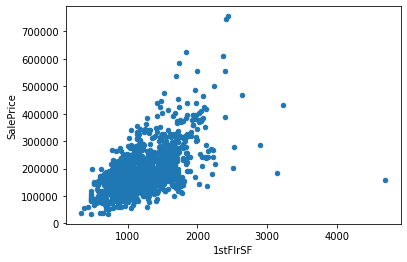

In [16]:
var="1stFlrSF"
data = pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

* 结论：1stFlrSF 与目标变量线性相关，保留。

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

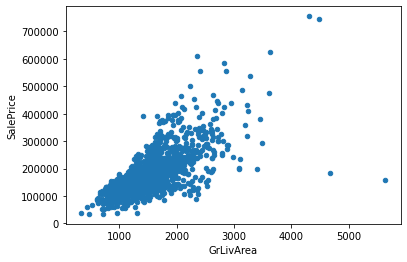

In [17]:
var="GrLivArea"
data = pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

* 结论：GrLivArea 与目标变量线性相关，保留。

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

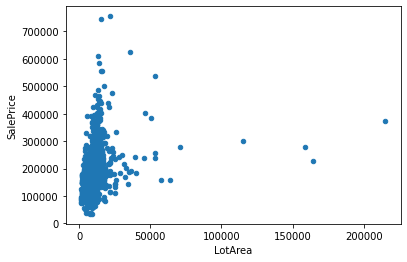

In [18]:
var="LotArea"
data = pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

* 结论：LotArea 与目标变量线性相关，保留。

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

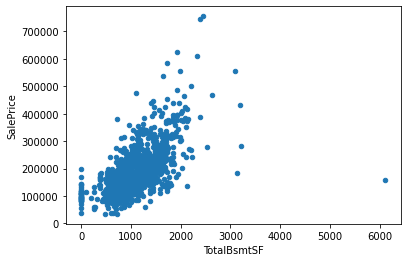

In [19]:
var="TotalBsmtSF"
data = pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

* 结论：TotalBsMtSF 与目标变量线性相关，保留。

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

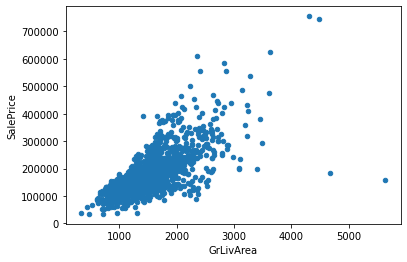

In [20]:
var="GrLivArea"
data = pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice")

* 结论：GrLivArea 与目标变量线性相关，保留。

# * **小结:**
1 目前从假定的13个相关特征，筛选到9个特征。\
2 连续型特征变量均与面积相关，猜测各个面积变量是否存在相关性，\ 
      在后面的分析中再次确认。
3 目前确定的变量如下：

     
| 特征变量 | 数据类型 | 含义 | 
| :-----| ----: | :----: 
| MSZoning | 分类 | 区域分类 |
| LotArea | 连续 | 建筑面积 |
| OverallQual| 分类 | 完工质量及用才 |
| YearBuilt | 分类 | 完工年份 |
| CentralAir | 分类 | 中央空调 |
| 1stFlrSF | 连续 | 1层面积 |
| GrLivArea | 连续 | 地面上生活区域 |
| TotalBsMtSF | 连续 | 地下室面积 |

# 3 深入探索数据关系，确认主要特征变量

* 本阶段的主要任务： 
* 1 在步骤二的基础上，进一步筛选特征变量
* 2 确定最终特征变量集

In [21]:
corrmat = data_train.corr()
corrmat['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

<AxesSubplot:>

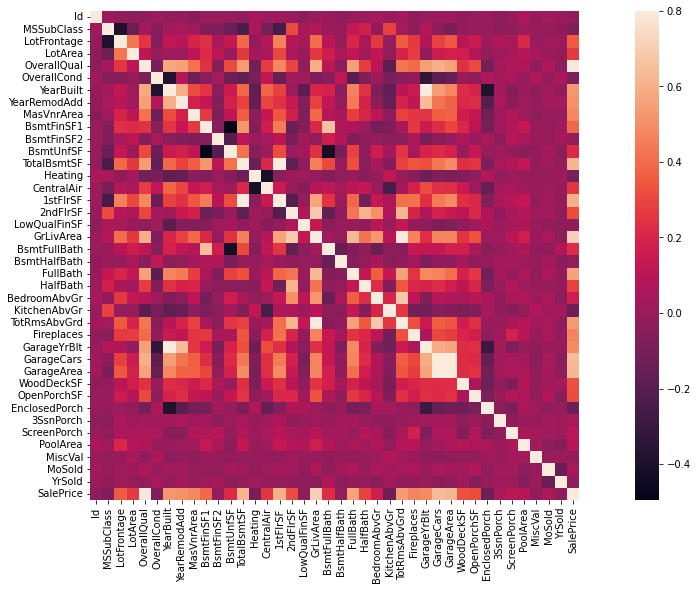

In [22]:
# 将Central 和Heating两个连续型变量做One-hot编码，查看相关性
from sklearn import preprocessing
f_names=['CentralAir','Heating']
for x in f_names:
    label= preprocessing.LabelEncoder()
    data_train[x]= label.fit_transform(data_train[x])
corrmat=data_train.corr()
f,ax= plt.subplots(figsize=(20,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

* 从热图可以看出很多，包括：
* 1 OVerallQual相关性最高；
* 2 GrLivArea，1stFIrSE相关性次之；
* 3 LoTArea, CentralAir、NeighhbourHood 相关性比较低；

* 注意：这里使用的是皮尔逊相关系数。皮尔逊系数的一个缺陷是Pearson相关系数的一个明显缺陷是，\
* 作为特征排序机制，他只对线性关系敏感。
* 如果关系是非线性的，即便两个变量具有一一对应的关系，Pearson相关性也可能会接近0。

In [23]:
corrmat['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
Heating         -0.098812
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
CentralAir       0.251328
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual 

* 1 GraggeCars和GarageArea 相关性高，选择GarageCares；\
 2 新添加TotalBsMtSF 这个特征；
 
| 特征变量 | 数据类型 | 含义 | 
| :-----| ----: | :----: 
| OverallQual| 分类 | 完工质量及用才 |
| GrLivArea | 连续 | 地面上生活区域 |
| GarageCars | 分类 | 完工年份 |
| TotalBsMtSF | 连续 | 地下室面积 |
| 1stFlrSF | 连续 | 1楼建筑面积 |
| FullBath | 分类 | 浴室数量 |

In [24]:
columns=['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath']

# 4 利用线性回归模型，对已有数据进行训练

In [25]:
from sklearn.linear_model import LinearRegression as LR
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [26]:
xtrain=data_train[columns]
ytrain=data_train['SalePrice'].values.reshape(-1,1)
display(xtrain)
display(ytrain)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath
0,7,1710,2,856,856,2
1,6,1262,2,1262,1262,2
2,7,1786,2,920,920,2
3,7,1717,3,756,961,1
4,8,2198,3,1145,1145,2
...,...,...,...,...,...,...
1455,6,1647,2,953,953,2
1456,6,2073,2,1542,2073,2
1457,7,2340,1,1152,1188,2
1458,5,1078,1,1078,1078,1


array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

## 4.1 使用sklearn的归一法对x和y进行处理

In [27]:
x_test= pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
xtest=x_test[columns]

In [28]:
xtest.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     1
TotalBsmtSF    1
1stFlrSF       0
FullBath       0
dtype: int64

In [29]:
xtest["TotalBsmtSF"].fillna(1046.11,inplace=True)
xtest["GarageCars"].fillna(1.76,inplace=True)

In [30]:
xtest

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath
0,5,896,1.0,882.0,896,1
1,6,1329,1.0,1329.0,1329,1
2,5,1629,2.0,928.0,928,2
3,6,1604,2.0,926.0,926,2
4,8,1280,2.0,1280.0,1280,2
...,...,...,...,...,...,...
1454,4,1092,0.0,546.0,546,1
1455,4,1092,1.0,546.0,546,1
1456,5,1224,2.0,1224.0,1224,1
1457,5,970,0.0,912.0,970,1


In [31]:
# 利用在训练集中的对y的log1p()模型

In [32]:
ytrain_log1p=np.log1p(data_train["SalePrice"])
model_log1p = LR().fit(xtrain, ytrain_log1p)
model_log1p.coef_

array([1.25419186e-01, 1.72762940e-04, 1.13960505e-01, 1.22932488e-04,
       3.75829472e-05, 3.97406655e-02])

In [33]:
ytest=model_log1p.predict(xtest)
ytest

array([11.63769727, 11.90914705, 11.92489123, ..., 11.86269414,
       11.54299034, 12.3647002 ])

In [34]:
# 对之前的log1p()做逆运算
xtest['SalePrice']= np.expm1(ytest)
xtest

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,SalePrice
0,5,896,1.0,882.0,896,1,113287.990592
1,6,1329,1.0,1329.0,1329,1,148618.859944
2,5,1629,2.0,928.0,928,2,150977.274233
3,6,1604,2.0,926.0,926,2,170359.201711
4,8,1280,2.0,1280.0,1280,2,219114.869265
...,...,...,...,...,...,...,...
1454,4,1092,0.0,546.0,546,1,87352.621017
1455,4,1092,1.0,546.0,546,1,97896.889855
1456,5,1224,2.0,1224.0,1224,1,141872.931953
1457,5,970,0.0,912.0,970,1,103051.138356


In [35]:
result=pd.concat([x_test['Id'],xtest['SalePrice']],axis=1)
result

,Id,SalePrice
0,1461,113287.990592
1,1462,148618.859944
2,1463,150977.274233
3,1464,170359.201711
4,1465,219114.869265
...,...,...
1454,2915,87352.621017
1455,2916,97896.889855
1456,2917,141872.931953
1457,2918,103051.138356


In [36]:
result.to_csv('house_price_resultv1.csv', index=False)